# Exploratory Data Analysis Introduction

This first session of the project aims to provide an overview and exploratory analysis of the dataset, examining the relationships between various columns and visualizing these relationships through charts. By doing so, we can uncover key insights and patterns in the data. 

The exploration will then narrow down to a specific country, allowing for a more focused analysis. This approach will enable a deeper understanding of the data jobs in that country, offering more relevant insights and actionable conclusions tailored to that specific country.

### Import Required Libraries for Analysis
This code imports libraries for data analysis and visualization. `pandas` handles structured data, `matplotlib` and `seaborn` create visualizations, and `ast` analyzes Python code structures. `datasets` likely accesses pre-built datasets for machine learning or analysis.

In [ ]:
import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

### Import Dataset
This code loads a dataset from the `datasets` library (Hugging Face's). The `load_dataset` function fetches the `'lukebarousse/data_jobs'` dataset. The 'train' split of the dataset is then converted into a pandas DataFrame for easier data manipulation and analysis.

In [2]:
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas() 

### Data Exploration
The `df.info()` function provides a summary of the DataFrame `df`. It displays information such as the number of entries (rows), the column names, the data types of each column, and the number of non-null values in each column. This helps to understand the structure and quality of the data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

### Data Cleanup
The `pd.to_datetime()` function is used to convert the `job_posted_date` column into a datetime format.

The `new_list` function checks if a value in `job_skills` is not null, and if so, uses `ast.literal_eval() `to safely evaluate the string as a Python literal (i.e., converting it from a string representation of a list to an actual list). This transformation is applied to the `job_skills` column using `.apply()`.


In [4]:
#Converted the datatype for job_posted_date from object to datetime
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

#Coverted the datatype for skill_list from string to list
def new_list(skill_list):  
   if pd.notna(skill_list): 
      return ast.literal_eval(skill_list)  
df['job_skills'] = df.job_skills.apply(new_list)

### Countries to explore

This code aims to count the number of job postings by country, select the top 10 countries with the highest job counts, and visualize the results in a horizontal bar chart. 

First, it uses `value_counts()` to calculate the frequency of job postings per country and then selects the top 10 with` .head(10)`. The `sns.barplot()` function is used to create a bar chart, with the job count plotted on the x-axis and country names on the y-axis. The `hue='count'` parameter adds a color gradient based on the job count, and the `palette='dark:m_r'` customizes the color scheme. To enhance the chart's appearance, `sns.despine()` removes the top and right spines, and `ax.set_title()` adds a title. `plt.tight_layout()` ensures the layout fits well within the plot area, and `plt.show()` displays the final visualization.

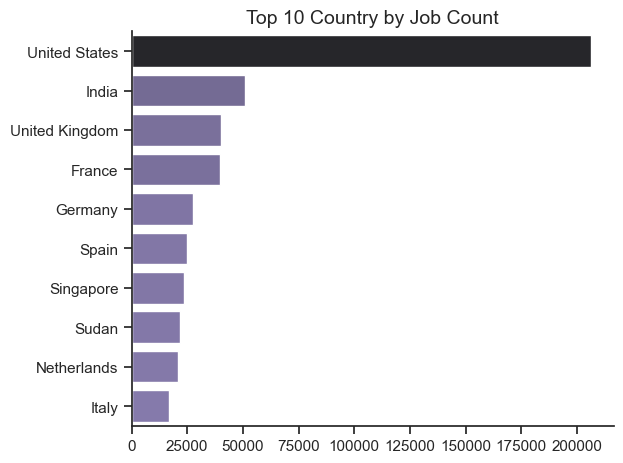

In [5]:
# Create a DataFrame that provides the count of each job_country and returns the top 10 most frequent job_countries
df_top_countries = df['job_country'].value_counts().to_frame()
job_countries = df['job_country'].value_counts().head(10).index.tolist()
df_top_countries = df_top_countries.head(10)

# Plot the bar chart
sns.set_theme(style='ticks') 
fig, ax = plt.subplots() # 'fig' provides access to the entire plot, while 'ax' provides access to the specific area where the data will be plotted

# Barplot
sns.barplot(
    data=df_top_countries,
    x='count',
    y=df_top_countries.index,
    hue='count',
    palette='dark:m_r',
    legend=False,
    ax=ax
)

# Customize the chart
ax.set_title('Top 10 Country by Job Count', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('')
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

### Job Posting Platform to Explore
The goal of this code is to analyze and visualize the top 10 most frequent ways jobs are posted in various job posting platforms (`job_via`) in the dataset. 

This code counts job postings by the `job_via` column, selects the top 10 most frequent entries, and visualizes the results in a horizontal bar chart. It first uses `value_counts()` to count the occurrences of each unique entry in `job_via` and then selects the top 10 with `.head(10)`. The code customizes the index, truncating the 9th entry to 20 characters with ellipsis (`...`) if necessary, using a list comprehension

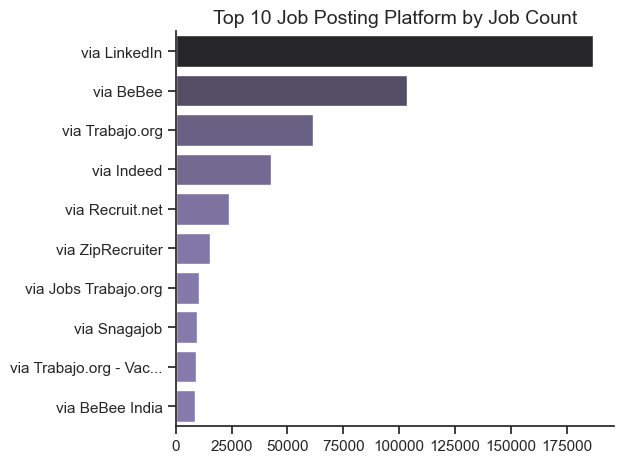

In [6]:
# Create a DataFrame that provides the count of each job_via and returns the top 10 most frequent job_titles
df_job_via = df['job_via'].value_counts().to_frame().head(10)
job_title = df['job_via'].value_counts().head(10).index.tolist()

df_job_via.index = [   # Begin creating a new index list for the DataFrame
    label if i != 8 else label[:21] + '...'  # Keep the label as is unless it's the 9th entry, then truncate to 20 chars and add "..."
    for i, label in enumerate(df_job_via.index) # Loop through each index, with 'i' as the position and 'label' as the value
]

# Plot the bar chart
sns.set_theme(style='ticks') 

# Barplot
sns.barplot(
    data=df_job_via,
    x='count',
    y=df_job_via.index,
    hue='count',
    palette='dark:m_r',
    legend=False,
)

# Customize the chart
plt.title('Top 10 Job Posting Platform by Job Count', fontsize=14)
plt.xlabel('')
plt.ylabel('')
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

### Data Jobs to Explore

The goal of this code is to count and visualize the top 10 most frequent job titles (`job_title_short`) in the dataset. It starts by using `df['job_title_short'].value_counts()` to count how many times each job title appears. The result is converted into a DataFrame with `.to_frame()` and the top 10 titles are selected with `.head(10)`.

A bar chart is created using `sns.barplot()`, where `x='count'` specifies that the job count is plotted on the x-axis, and `y=df_job_title_short.index` places the job titles on the y-axis. The `hue='count'` parameter applies a color gradient based on the job counts, and `palette='dark:m_r'` sets the color theme.

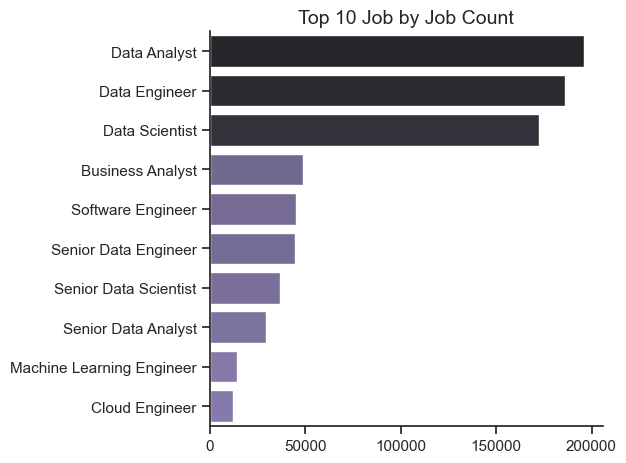

In [7]:
# Create a DataFrame that provides the count of each job_title_short and returns the top 10 most frequent job_titles
df_job_title_short = df['job_title_short'].value_counts().to_frame().head(10)
job_title = df['job_title_short'].value_counts().head(10).index.tolist()

# Plot the bar chart
sns.set_theme(style='ticks') 

# Barplot
sns.barplot(
    data=df_job_title_short,
    x='count',
    y=df_job_title_short.index,
    hue='count',
    palette='dark:m_r',
    legend=False,
)

# Customize the chart
plt.title('Top 10 Job by Job Count', fontsize=14)
plt.xlabel('')
plt.ylabel('')
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()



### Job Benefits

The goal of this code is to create three pie charts side by side, each representing a different feature of job listings, such as whether the job is remote, requires a degree, or offers health insurance.

The `various_plots` dictionary maps column names from the DataFrame to descriptive titles. The code uses `plt.subplots(1, 3)` to create a figure with three subplots arranged in one row. `fig.set_size_inches((10, 6))` sets the size of the figure.

For each item in the `various_plots` dictionary, the code loops through the columns and their corresponding titles. `ax[i].pie()` creates a pie chart for each feature, using `df[column].value_counts()` to count the occurrences of True and False values in each column. `labels=['False', 'True']` adds labels for each slice, and `autopct='%1.1f%%'` displays the percentage on the chart. `startangle=90` rotates the chart to start at the top.

`ax[i].set_title(title, fontsize=15)` adds the appropriate title to each subplot and increase the fontsize.

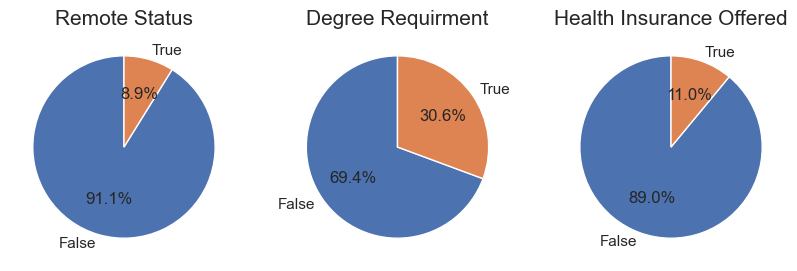

In [8]:
various_plots = {
    'job_work_from_home': 'Remote Status',
    'job_no_degree_mention': 'Degree Requirment',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((10, 6))

for i, (column, title) in enumerate(various_plots.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title, fontsize=15)

### Companies to Explore

The goal of this code is to count the number of job postings per company and visualize the top 10 companies with the most job postings.

It begins by using `df['company_name'].value_counts()` to count the occurrences of each company in the `company_name` column. The result is converted into a DataFrame with `.to_frame()` and the top 10 companies are selected with `.head(10)`.

The bar chart is created using `sns.barplot()`, where `x='count'` specifies that the job count for each company will be plotted on the x-axis, and `y=df_company.index` places the company names on the y-axis. The `hue='count'` parameter applies a color gradient based on the job counts, and `palette='dark:m_r'` sets the color scheme.

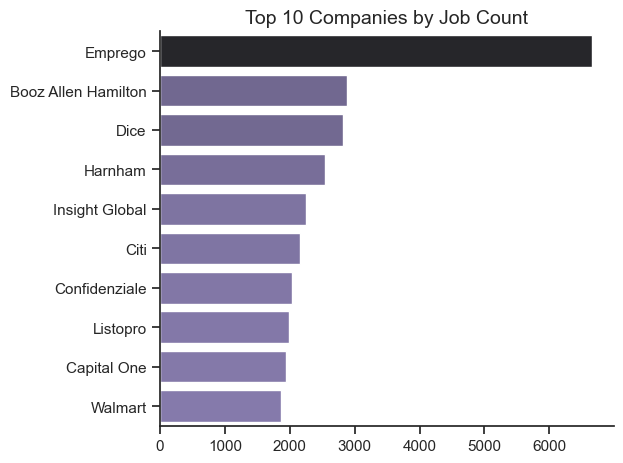

In [9]:
df_company = df['company_name'].value_counts().to_frame().head(10)
df_company

# Plot the bar chart
sns.set_theme(style='ticks') 

# Barplot
sns.barplot(
    data=df_company,
    x='count',
    y=df_company.index,
    hue='count',
    palette='dark:m_r',
    legend=False,
)

# Customize the chart
plt.title('Top 10 Companies by Job Count', fontsize=14)
plt.xlabel('')
plt.ylabel('')
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

# Exploratory Data Analysis for India

This section narrow down the exploration to only job postings in India.

### Filter df_India dataset for only job_country as India

This code filters the dataset `df` to create a new DataFrame, `df_India`, that contains only the rows where the `job_country` column is equal to `'India'`. It essentially extracts all job postings in the dataset that are associated with India.

In [10]:
df_India = df[(df['job_country'] == 'India')]

### Most Sought-After Jobs
The goal of this code is to analyze and visualize the top 10 most frequent job titles in India from the dataset.

First, it uses `df_India['job_title_short'].value_counts()` to count the occurrences of each job title in the `job_title_short` column. The result is converted into a DataFrame with `.to_frame()` and the top 10 job titles are selected using `.head(10)`.

A bar chart is created using `sns.barplot()`, where the job count is plotted on the x-axis (`x='count'`) and the job titles on the y-axis (`y=df_India_job_title_short.index`). The `hue='count'` parameter adds a color gradient based on the job count, and `palette='dark:m_r'` customizes the color scheme.

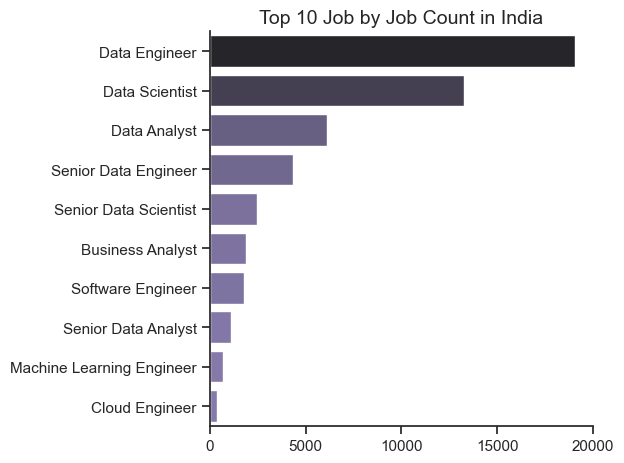

In [11]:
# Create a DataFrame that provides the count of each job_title_short and returns the top 10 most frequent job_titles
df_India_job_title_short = df_India['job_title_short'].value_counts().to_frame().head(10)
job_title = df_India['job_title_short'].value_counts().head(10).index.tolist()

# Plot the bar chart
sns.set_theme(style='ticks') 

# Barplot
sns.barplot(
    data=df_India_job_title_short,
    x='count',
    y=df_India_job_title_short.index,
    hue='count',
    palette='dark:m_r',
    legend=False,
)

# Customize the chart
plt.title('Top 10 Job by Job Count in India', fontsize=14)
plt.xlabel('')
plt.ylabel('')
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


### Data Analyst Average Yearly Salary in India
The goal of this code is to visualize the distribution of average yearly salaries for "Data Analyst" job titles in India.

First, the code filters the dataset to include only rows where the `job_title_short` is `'Data Analyst'`, creating the df_India_salary DataFrame. Then, it uses `sns.displot()` to create a kernel density estimate (KDE) plot, which shows the distribution of the `salary_year_avg` column. The `kind='kde'` parameter specifies a KDE plot, and `fill=True` fills the area under the curve. `common_norm=False` ensures that the density is normalized separately for each data subset.

The x-axis limit is set with `plt.xlim(0, 250000)` to focus on salaries between 0 and 250,000 USD.



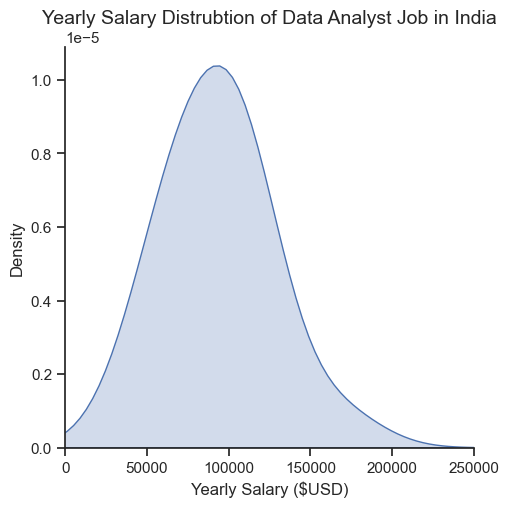

In [12]:
df_India_salary = df_India[df_India['job_title_short'] == 'Data Analyst']

sns.displot(df_India_salary['salary_year_avg'], kind='kde', fill=True, common_norm=False)
plt.xlim(0, 250000) #Set the lim for the x-axis

plt.title('Yearly Salary Distrubtion of Data Analyst Job in India', fontsize=14)
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('Density')
plt.show()

### Companies to explore
The goal of this code is to visualize the top 10 companies with the most job postings in India.

First, it uses `df_India['company_name'].value_counts()` to count the occurrences of each company in the `company_name` column. The result is converted to a DataFrame with `.to_frame()` and the top 10 most frequent companies are selected using `.head(10)`.

The company names in the index are adjusted with a list comprehension that truncates the 6th company name to 27 characters, adding "..." for readability.

A bar chart is created using `sns.barplot()`, with job count on the x-axis (`x='count'`) and company names on the y-axis (`y=df_India_company.index`).

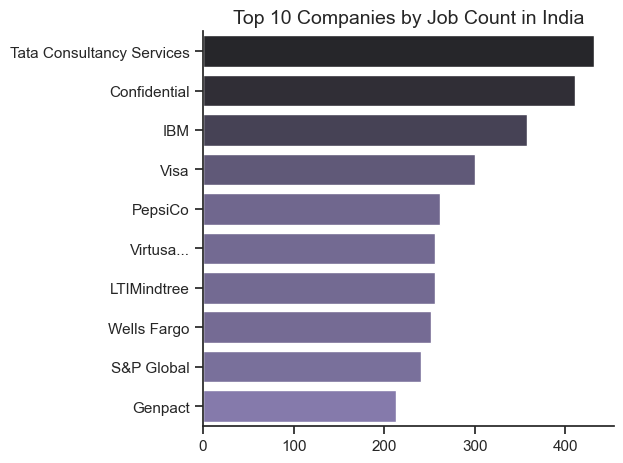

In [13]:
# Create a DataFrame that provides the count of each company_name and returns the top 10 most frequent companies
df_India_company =df_India['company_name'].value_counts().to_frame().head(10)

# Plot the bar chart
sns.set_theme(style='ticks') 

df_India_company.index = [   # Begin creating a new index list for the DataFrame
    label if i != 5 else label[:27] + '...'  # Keep the label as is unless it's the 6th entry, then truncate to 27 chars and add "..."
    for i, label in enumerate(df_India_company.index) # Loop through each index, with 'i' as the position and 'label' as the value
]

# Barplot
sns.barplot(
    data=df_India_company,
    x='count',
    y=df_India_company.index,
    hue='count',
    palette='dark:m_r',
    legend=False,
)

# Customize the chart
plt.title('Top 10 Companies by Job Count in India', fontsize=14)
plt.xlabel('')
plt.ylabel('')
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

### Job Benefit in India
The goal of this code is to create pie charts for different job attributes in India, specifically showing the distribution of remote work status, degree requirement, and health insurance availability.

First, a dictionary various_plots is created, mapping each column in the DataFrame (`'job_work_from_home'`, `'job_no_degree_mention'`, `'job_health_insurance'`) to a corresponding title for the plot.

The `plt.subplots(1, 3)` function creates a figure with three subplots arranged in one row. `fig.set_size_inches((10, 6))` sets the size of the entire figure.

The for loop iterates over the dictionary, creating a pie chart for each column using `ax[i].pie()`. The `value_counts()` method counts occurrences of each unique value in the column, and `labels=['False', 'True']` labels the segments as False or True. The `autopct='%1.1f%%'` formats the percentage displayed on each segment, and `startangle=90` rotates the pie chart for better orientation. Each pie chart is given a title based on the dictionary values with `ax[i].set_title(title)`.

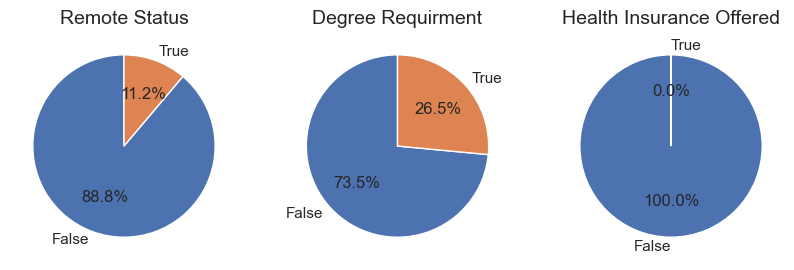

In [14]:
various_plots = {
    'job_work_from_home': 'Remote Status',
    'job_no_degree_mention': 'Degree Requirment',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((10, 6))

for i, (column, title) in enumerate(various_plots.items()):
    ax[i].pie(df_India[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title, fontsize=14)